<a href="https://colab.research.google.com/github/daveikin/pr/blob/main/coco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import cv2
import requests
import random
from google.colab.patches import cv2_imshow
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [ ]:
#from google.colab import files
#files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataDir='/content/drive/MyDrive/annotations_trainval2017/'
#dataType='train2017'
#annFile='{}/instances_{}.json'.format(dataDir,dataType)
annFile='{}/filtered2.json'.format(dataDir)
print(annFile)
coco=COCO(annFile)

/content/drive/MyDrive/annotations_trainval2017//filtered2.json
loading annotations into memory...
Done (t=10.67s)
creating index...
index created!


# Новый раздел

In [ ]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person backpack handbag suitcase

COCO supercategories: 
person accessory


In [ ]:
# get all images containing given categories, select one at random
catIds1 = coco.getCatIds(catNms=['person','handbag']);
catIds2 = coco.getCatIds(catNms=['person','suitcase']);
catIds3 = coco.getCatIds(catNms=['person','backpack']);
catIds4 = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds(catIds=catIds1 );
imgIds2 = coco.getImgIds(catIds=catIds2 );
imgIds3 = coco.getImgIds(catIds=catIds3 );
imgIds4 = coco.getImgIds(catIds=catIds4 );
print(len(imgIds),len(imgIds2),len(imgIds3),len(imgIds4))
imgIds.extend(imgIds2) 
imgIds.extend(imgIds3)
imgIds.extend(imgIds4)    
print(imgIds)
def f(l):
    n = []
    for i in l:
        if i not in n:
            n.append(i)
    return n
catIds=[]    
catIds.extend(catIds1)
catIds.extend(catIds2)
catIds.extend(catIds3)
catIds.extend(catIds4)
catIds=f(catIds)
#imgIds = coco.getImgIds(imgIds = [163840])
#img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
#img = coco.loadImgs(imgIds[0])[0]

#print(img)


6222 1540 5034 64115
[163840, 294914, 262148, 294918, 229383, 32777, 163852, 458772, 294933, 360473, 163866, 524314, 131101, 294954, 196653, 360494, 98350, 262191, 32829, 196676, 557130, 86, 426079, 360548, 393317, 196721, 458876, 131197, 360573, 127, 262274, 524420, 229511, 360595, 524436, 32918, 524450, 229544, 491689, 295082, 360624, 65712, 426161, 426170, 491707, 196797, 557246, 164042, 196811, 131276, 262353, 426201, 32985, 524507, 241, 295154, 98554, 459003, 257, 426246, 491793, 459026, 557334, 557343, 131364, 131366, 196919, 491835, 315, 196931, 459082, 262476, 98641, 338, 295257, 459103, 98656, 393576, 393578, 164205, 295282, 491910, 426390, 557467, 295328, 393634, 65962, 328110, 393647, 328120, 262588, 65982, 65984, 491981, 295376, 262609, 459234, 295399, 33262, 524786, 492020, 328181, 524790, 557567, 426500, 131589, 98830, 66067, 532, 536, 295448, 557595, 164381, 542, 524830, 33325, 492078, 229936, 557627, 229949, 262718, 492096, 557633, 295491, 295499, 98892, 557648, 229969,

In [ ]:
#for i in imgIds:
##i=0
#mg[i]=coco.loadImgs(imgIds[0])[0]
#print(img)
#print(str(img['coco_url']))

In [ ]:

url=[]
img=[]
urls=set()
for i in range(0,len(imgIds)):
  img.append(coco.loadImgs(imgIds[i])[0])
  url.append(str(img[i]['coco_url']))
  urls.add(str(img[i]['coco_url']))
#print(url)


In [ ]:
print(img[5]['id'])
print(len(url))
print(len(urls))

32777
76911
64115


In [ ]:
def download_file(url):
    local_filename = url.split('/')[-1]
    # NOTE the stream=True parameter below
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                # If you have chunk encoded response uncomment if
                # and set chunk_size parameter to None.
                #if chunk: 
                f.write(chunk)
    return local_filename

In [ ]:
print(len(url))
filename=[]
for i in range(0,len(url)):
  filename.append(download_file(url[i]))
  if i%100==0:
    print(round(100*i/len(url),1),'%')

76911
0.0 %
0.1 %
0.3 %


KeyboardInterrupt: ignored

In [ ]:
#!wget 'http://images.cocodataset.org/train2017/000000163840.jpg' -q -O input.jpg
#!wget (str(img['coco_url'])) -q -O input.jpg

#url = str(img['coco_url'])
#filename = download_file(url)

#img['coco_url']
#im = cv2.imread(filename)
#cv2_imshow(im)

In [ ]:
#img['coco_url']
#im = cv2.imread(filename[1])
#cv2_imshow(im)

In [ ]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
#I = io.imread(filename[1])
#plt.axis('off')
#plt.imshow(I)
#plt.show()

In [ ]:
#len(filename)
#min(filename)
#filename.index(min(filename))

21

/content


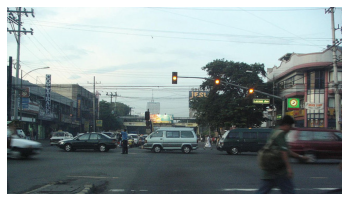

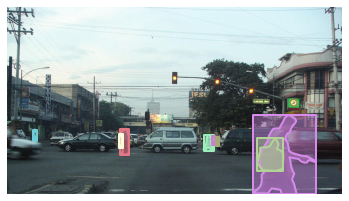

In [ ]:
i=7

%cd /content
I = io.imread(filename[i])
plt.axis('off')
plt.imshow(I)
plt.show()
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img[i]['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
#a=coco.loadAnns(coco.getCatIds(annIds)
#print(annIds)
coco.showAnns(anns,draw_bbox=True)

In [ ]:
I.shape[:2]

(640, 480)

In [ ]:
%cd /content
!git clone https://github.com/haotian-liu/yolact_edge.git
!git clone https://github.com/chentinghao/download_google_drive.git

%cd yolact_edge
!mkdir -p weights

!python ../download_google_drive/download_gdrive.py 1EAzO-vRDZ2hupUJ4JFSUi40lAZ5Jo-Bp ./weights/yolact_edge_54_800000.pth
!python ../download_google_drive/download_gdrive.py 15jyd5CRJxNiA41UMjGbaSnmaytfeILfI ./calib_images_coco.zip
!unzip -q calib_images_coco.zip

/content
Cloning into 'yolact_edge'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 327 (delta 13), reused 25 (delta 10), pack-reused 292
Receiving objects: 100% (327/327), 24.08 MiB | 42.58 MiB/s, done.
Resolving deltas: 100% (177/177), done.
Cloning into 'download_google_drive'...
remote: Enumerating objects: 16, done.
remote: Total 16 (delta 0), reused 0 (delta 0), pack-reused 16
Unpacking objects: 100% (16/16), done.
/content/yolact_edge
194MB [00:03, 65.0MB/s]
15.8MB [00:00, 111MB/s] 


In [ ]:
%cd /content/yolact_edge/

from eval import *
from utils.logging_helper import setup_logger

from google.colab.patches import cv2_imshow

parse_args(["--config=yolact_edge_config", "--calib_images=../calib_images"])

from eval import args

setup_logger(logging_level=logging.INFO)
logger = logging.getLogger("yolact.eval")

/content/yolact_edge


/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/yolact_edge/utils/cython_nms.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [ ]:
args.trained_model = "./weights/yolact_edge_54_800000.pth"
args.yolact_transfer = True

torch.set_default_tensor_type('torch.cuda.FloatTensor')

logger.info('Loading model...')
net = Yolact(training=False)
net.load_weights(args.trained_model, args=args)
net.eval()
logger.info('Model loaded.')

net.detect.use_fast_nms = args.fast_nms
cfg.mask_proto_debug = args.mask_proto_debug

args.score_threshold = 0.08
args.top_k = 15

[04/02 12:07:06 yolact.eval]: Loading model...
WARNING [04/02 12:07:17 yolact.model.load]: `--coco_transfer` or `--yolact_transfer` is no longer needed. The code will automatically detect and convert YOLACT-trained weights now.
[04/02 12:07:17 yolact.eval]: Model loaded.


In [ ]:
frame = torch.from_numpy(I).cuda().float()
batch = FastBaseTransform()(frame.unsqueeze(0))

extras = {"backbone": "full", "interrupt": False, "keep_statistics": False,
          "moving_statistics": None}

with torch.no_grad():
    preds = net(batch, extras=extras)["pred_outs"]

In [ ]:
# Look at the output predictions.

dets = preds[0]

print('Scores:', dets['score'][:args.top_k])
print('Classes:', dets['class'][:args.top_k])
print('Boxes:', dets['box'][:args.top_k])

Scores: tensor([0.9253, 0.9014, 0.8057, 0.4747, 0.4637, 0.4165, 0.3503, 0.2578, 0.2269,
        0.2237, 0.1884, 0.1656, 0.1498, 0.1336, 0.1314])
Classes: tensor([13,  0, 13, 26, 26, 26,  0, 24, 26,  0,  0,  0, 24, 58, 26])
Boxes: tensor([[-6.6465e-02,  3.9674e-01,  1.0688e+00,  8.3249e-01],
        [ 1.4190e-01,  2.1002e-01,  3.8663e-01,  7.8328e-01],
        [ 5.8259e-02,  3.1003e-01,  6.1611e-01,  8.1733e-01],
        [ 4.7228e-01,  5.2278e-01,  5.2073e-01,  5.8931e-01],
        [ 5.7518e-01,  4.5203e-01,  6.4984e-01,  5.4125e-01],
        [ 1.3450e-01,  4.4997e-01,  2.4777e-01,  6.0068e-01],
        [ 1.2676e-01,  2.6232e-01,  7.1274e-01,  8.0691e-01],
        [ 1.4410e-01,  4.4812e-01,  2.4651e-01,  5.9197e-01],
        [ 8.9821e-01,  6.9757e-01,  1.0044e+00,  9.1810e-01],
        [ 3.9490e-01,  3.0578e-01,  6.3327e-01,  7.9244e-01],
        [ 8.7856e-01,  2.3146e-01,  9.9596e-01,  8.5721e-01],
        [ 6.6292e-01,  2.9555e-01,  9.0871e-01,  8.2578e-01],
        [ 8.9216e-01,  7.0

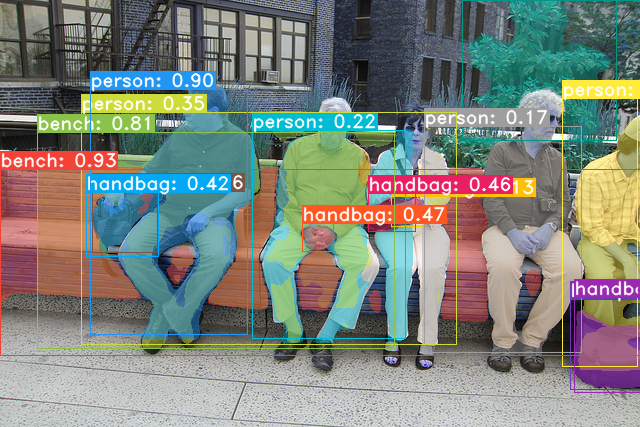

In [ ]:

# Visualize the predictions

img_numpy = prep_display(preds, frame, None, None, undo_transform=False)

cv2_imshow(img_numpy)

/content


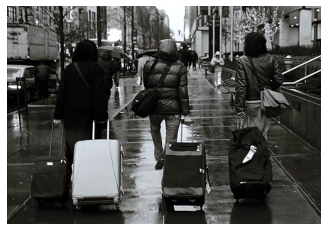

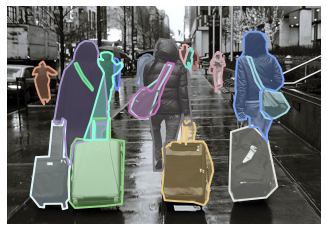

In [ ]:

%cd /content
I = io.imread(filename[i])
plt.axis('off')
plt.imshow(I)
plt.show()
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img[i]['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns,draw_bbox=True)

In [ ]:
import numpy as np
AttScores=np.array([0.1,0.5,0.3, 0.1]) 
Input= np.array([[1,0,2],[0,1,3],[1,3,0],[0,0,0]])
print(AttScores)
print(Input)
print(AttScores@Input)

[0.1 0.5 0.3 0.1]
[[1 0 2]
 [0 1 3]
 [1 3 0]
 [0 0 0]]
[0.4 1.4 1.7]


In [ ]:
from scipy.special import softmax

In [ ]:
import json
from pathlib import Path

class CocoFilter():

    def _process_info(self):
        self.info = self.coco['info']
        
    def _process_licenses(self):
        self.licenses = self.coco['licenses']

    def _process_categories(self):
        self.categories = dict()
        self.super_categories = dict()
        self.category_set = set()

        for category in self.coco['categories']:
            #print(self.coco['categories'])
            cat_id = category['id']
            super_category = category['supercategory']

            # Add category to categories dict
            #print('hdtjuy',self.categories)
            if cat_id not in self.categories:
                self.categories[cat_id] = category
                self.category_set.add(category['name'])
            else:
                print(f'ERROR: Skipping duplicate category id: {category}')

            # Add category id to the super_categories dict
            if super_category not in self.super_categories:
                self.super_categories[super_category] = {cat_id}
            else:
                self.super_categories[super_category] |= {cat_id} # e.g. {1, 2, 3} |= {4} => {1, 2, 3, 4}

    def _process_images(self):
        self.images = dict()
        for image in self.coco['images']:
            image_id = image['id']
            if image_id not in self.images:
                self.images[image_id] = image
            else:
                print(f'ERROR: Skipping duplicate image id: {image}')

    def _process_segmentations(self):
        self.segmentations = dict()
        for segmentation in self.coco['annotations']:
            image_id = segmentation['image_id']
            if image_id not in self.segmentations:
                self.segmentations[image_id] = []
            self.segmentations[image_id].append(segmentation)

    def _filter_categories(self):
        """ Find category ids matching args
            Create mapping from original category id to new category id
            Create new collection of categories
        """
        missing_categories = set(self.filter_categories) - self.category_set
        #print(len(missing_categories),missing_categories,set(self.filter_categories), self.category_set)
        if len(missing_categories) > 0:
            print(f'Did not find categories: {missing_categories}')
            should_continue = input('Continue? (y/n) ').lower()
            if should_continue != 'y' and should_continue != 'yes':
                print('Quitting early.')
                quit()

        self.new_category_map = dict()
        new_id = 1
        for key, item in self.categories.items():
            if item['name'] in self.filter_categories:
                self.new_category_map[key] = new_id
                new_id += 1
        print(self.new_category_map)

        self.new_categories = []
        for original_cat_id, new_id in self.new_category_map.items():
            #print(original_cat_id,new_id )
            new_category = dict(self.categories[original_cat_id])
            #print(dict(self.categories[original_cat_id]))
            new_category['id'] = new_id
            self.new_categories.append(new_category)
        print(self.new_categories)
    def _filter_annotations(self):
        """ Create new collection of annotations matching category ids
            Keep track of image ids matching annotations
        """
        self.new_segmentations = []
        self.new_image_ids = set()
        for image_id, segmentation_list in self.segmentations.items():
            #print(segmentation_list,'\n')
            #print(segmentation_list[category_id],'\n')
            for segmentation in segmentation_list:
                #Проверка, что на изображении есть человек
                if segmentation['category_id']==1:
                    metka=True
                    #print(metka,'\n')
            if metka==True:
                for segmentation in segmentation_list:
                    #print(segmentation,'\n')
                    original_seg_cat = segmentation['category_id']
                    if original_seg_cat in self.new_category_map.keys():
                        new_segmentation = dict(segmentation)
                        new_segmentation['category_id'] = self.new_category_map[original_seg_cat]
                        #print(new_segmentation['bbox'])
                        self.new_segmentations.append(new_segmentation)
                        self.new_image_ids.add(image_id)
        print(len(self.new_segmentations), len(self.new_image_ids))
        #print(self.new_segmentations)


    def _peresechenii(self, pr1, pr2):

        ax1, ay1, ax2, ay2 = [i for i in pr1]
        ax2 = ax1 + ax2
        ay2 = ay1 + ay2

        bx1, by1, bx2, by2 = [i for i in pr2]
        bx2 = bx1 + bx2
        by2 = by1 + by2

        s1 = (ax1 >= bx1 and ax1 <= bx2) or (ax2 >= bx1 and ax2 <= bx2)
        s2 = (ay1 >= by1 and ay1 <= by2) or (ay2 >= by1 and ay2 <= by2)
        s3 = (bx1 >= ax1 and bx1 <= ax2) or (bx2 >= ax1 and bx2 <= ax2)
        s4 = (by1 >= ay1 and by1 <= ay2) or (by2 >= ay1 and by2 <= ay2)

        if ((s1 and s2) or (s3 and s4)) or ((s1 and s4) or (s3 and s2)):
            return True
        else:
            return False

    def _bigrazmer(self,pr1, pr2):
        crit = 0.3
        ax1, ay1, ax2, ay2 = [i for i in pr1]
        S1 = ax2 * ay2

        bx1, by1, bx2, by2 = [i for i in pr2]
        S2 = bx2 * by2

        if S2 / (S1 + 0.001) > crit:
            return True
        else:
            return False

    def _unionbbox(self, pr1, pr2):
        ax1, ay1, ax2, ay2 = [i for i in pr1]

        ax2 = ax1 + ax2
        ay2 = ay1 + ay2

        bx1, by1, bx2, by2 = [i for i in pr2]

        bx2 = bx1 + bx2
        by2 = by1 + by2
        prunion=[]
        prunion.append(min(ax1,bx1))
        prunion.append(min(ay1,by1))
        prunion.append(max(ax2, bx2) - min(ax1, bx1))
        prunion.append(max(ay2, by2) - min(ay1, by1))
        return prunion


    def _create_new_cat(self):
        self.new_cat2 = []
        self.new_segmentations2 = []
        self.new_image_ids2 = set()
        for i in range(0,len(self.new_cat)):
            self.new_categories2=dict({'supercategory': 'person', 'id': i+1, 'name':new_cat[i] })
            self.new_cat2.append(self.new_categories2)
        print(self.new_cat2)
        #z=0
        for cimage_id, csegmentation_list in self.segmentations.items():
            #print(segmentation_list,'\n')
            #print(segmentation_list[category_id],'\n')
            for i in csegmentation_list:
                #print(i,'\n')
                create_segmentation = dict(i)
                if create_segmentation['category_id']==1:
                    for j in csegmentation_list:
                        create_segmentation2 = dict(j)
                        if create_segmentation2['category_id'] != 1 :
                            #print(z,create_segmentation['bbox'],create_segmentation2['bbox'])
                            #z+=1
                            if self._peresechenii(create_segmentation['bbox'],create_segmentation2['bbox'])==True:
                                if self._bigrazmer(create_segmentation['bbox'],create_segmentation2['bbox'])==True:
                                    temp_segmentation=create_segmentation
                                    temp_segmentation['category_id'] = 3
                                    temp_segmentation['bbox']=self._unionbbox(create_segmentation['bbox'],create_segmentation2['bbox'])
                                    temp_segmentation['segmentation'] = create_segmentation['segmentation']
                                    self.new_segmentations2.append(temp_segmentation)
                                    self.new_image_ids2.add(cimage_id)
                                else:
                                    temp_segmentation = create_segmentation
                                    temp_segmentation['category_id'] = 2
                                    temp_segmentation['bbox'] = self._unionbbox(create_segmentation['bbox'],create_segmentation2['bbox'])
                                    #temp_segmentation['segmentation']=None
                                    temp_segmentation['segmentation'] = create_segmentation['segmentation']
                                    self.new_segmentations2.append(temp_segmentation)
                                    self.new_image_ids2.add(cimage_id)
                            else:
                                temp_segmentation = create_segmentation
                                temp_segmentation['category_id'] = 1
                                #temp_segmentation['segmentation'] = None
                                self.new_segmentations2.append(temp_segmentation)
                                self.new_image_ids2.add(cimage_id)
        print(len(self.new_segmentations2), len(self.new_image_ids2))
    def _filter_images(self):
        """ Create new collection of images
        """
        self.new_images = []
        for image_id in self.new_image_ids2:
            self.new_images.append(self.images[image_id])





    def main(self, input_json,output_json,categori,new_cat):
        # Open json
        self.input_json_path = input_json
        self.output_json_path = output_json
        self.filter_categories = categori
        self.new_cat=new_cat

        # Load the json
        print('Loading json file...')
        with open(self.input_json_path) as json_file:
            self.coco = json.load(json_file)
        
        # Process the json
        print('Processing input json...')
        self._process_info()
        self._process_licenses()
        self._process_categories()
        self._process_images()
        self._process_segmentations()
        #print(self.categories)

        #print(self.segmentations[1])

        # Filter to specific categories
        print('Filtering...')
        self._filter_categories()

        self._filter_annotations()
        self._create_new_cat()
        self._filter_images()

        #Build new JSON
        new_master_json = {
            'info': self.info,
            'licenses': self.licenses,
            'images': self.new_images,
            'annotations': self.new_segmentations2,
            'categories': self.new_cat2
        }

        #Write the JSON to a file
        print('Saving new json file...')
        with open(self.output_json_path, 'w+') as output_file:
            json.dump(new_master_json, output_file)
        print('Filtered json saved.')

#categori = ['person', 'backpack', 'handbag']
categori = ['person', 'backpack', 'handbag', 'suitcase']
new_cat=['person_without_bag','person_with_small_bag','person_with_big_bag']
#input_json = 'Z:/Загрузки/annotations_trainval2017/instances_train2017.json'
input_json = 'D:/filtered2.json'
#input_json = 'D:/instances_val2017.json'

output_json = 'D:/filtered7.json'
#print(input_json, output_json, categori,new_cat)
cf = CocoFilter()
cf.main(input_json,output_json,categori,new_cat)